<a href="https://colab.research.google.com/github/ClassNeuralNetwork/Indicador_diabetes/blob/main/Indicator_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Indicador de Diabete, verificando se o paciente contém traços correspondentes ao diagnóstico de diabete.

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

## 1. Importando bibliotecas

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

## 2. Carregando dataset

In [6]:
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2021.csv')


In [7]:
lista = ['negativo_diabets','positivo_diabets']
# df.columns = lista
# df.head()


### 2.1. Informações do dataset


In [8]:
df.shape #QUANTIDADE DE LINHAS | QUANTIDADE DE COLUNAS

(236378, 22)

In [9]:
df.info() #INFORMAÇÕES DA TABELA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [10]:
df.isnull().sum() #VALORES NULOS

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [11]:
df.head(10) #IMPRIMINDO AS 10 PRIMEIRAS INFORMAÇÕES

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
5,0.0,1,0.0,1,40.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,5.0,25.0,1.0,0,10,4.0,8.0
6,0.0,1,1.0,1,27.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,25.0,0.0,0.0,0,10,5.0,3.0
7,1.0,0,0.0,1,24.0,0.0,0.0,1.0,0,0,...,1,0.0,4.0,0.0,0.0,0.0,1,12,6.0,7.0
8,0.0,1,1.0,1,30.0,0.0,0.0,0.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,7,4.0,6.0
9,0.0,1,1.0,1,36.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,0.0,0.0,0.0,1,10,4.0,8.0


### 2.2. Dividindo o dataset em atributos e classes

In [12]:
classes = df['Diabetes_binary'].unique()
print(classes)

[0. 1.]


In [13]:
# Convertendo as classes em valores numéricos
# LE = LabelEncoder()
#df['class'] = LE.fit_transform(df['class'])

In [14]:
df['Diabetes_binary'].value_counts() #VERIFICAÇÃO DE BALANCEAMENTO

,count
Diabetes_binary,
0.0,202810
1.0,33568


In [15]:
y = df['Diabetes_binary'] # Classes/Labels
df = df.drop(['Diabetes_binary'], axis = 1)
x = df.iloc[:, 0:22].values # Atributos/Features

In [16]:
df.iloc[:, 0:22].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                236378 non-null  int64  
 1   HighChol              236378 non-null  float64
 2   CholCheck             236378 non-null  int64  
 3   BMI                   236378 non-null  float64
 4   Smoker                236378 non-null  float64
 5   Stroke                236378 non-null  float64
 6   HeartDiseaseorAttack  236378 non-null  float64
 7   PhysActivity          236378 non-null  int64  
 8   Fruits                236378 non-null  int64  
 9   Veggies               236378 non-null  int64  
 10  HvyAlcoholConsump     236378 non-null  int64  
 11  AnyHealthcare         236378 non-null  int64  
 12  NoDocbcCost           236378 non-null  float64
 13  GenHlth               236378 non-null  float64
 14  MentHlth              236378 non-null  float64
 15  

In [17]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1,0.0,1,28.0,0.0,0.0,1.0,0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1,1.0,1,33.0,0.0,0.0,0.0,1,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,0,1.0,1,29.0,0.0,1.0,1.0,1,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0,0.0,1,24.0,1.0,0.0,0.0,0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [18]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
dataset_res, ouput_label = sm.fit_resample(x, y)

In [19]:
ouput_label.value_counts()

,count
Diabetes_binary,
0.0,202810
1.0,202810


## 3. Dividindo o dataset em treino e teste

In [20]:
# Dividindo os dados em treino e teste em 80% e 20% respectivamente
entrada_treino, entrada_test, saida_treino, saida_test = train_test_split(dataset_res, ouput_label, test_size=0.2)

# Padronizando os dados de entrada (X) para média 0 e desvio padrão 1
sc = StandardScaler()
sc.fit(entrada_treino)
x_treino_padrao = sc.fit_transform(entrada_treino)
x_test_padrao = sc.transform(entrada_test)

# Convertendo as classes em valores numéricos


# saida_treino_onehot = pd.get_dummies(saida_treino).values
# saida_test_onehot = pd.get_dummies(saida_test).values

In [21]:
x_treino_padrao.shape

(324496, 21)

## 4. Criando o modelo

Documentação

https://keras.io/api/layers/activations/

https://keras.io/api/layers/core_layers/dense/

https://keras.io/api/optimizers/

In [22]:
# e camada de saída com 2 neurônios (2 classes)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(500, input_dim=21, kernel_regularizer=tf.keras.regularizers.L2(0.01), activation='sigmoid', name='oculta'))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(21,)))

# Camada oculta 2 com 400 neurônios
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Camada oculta 3 com 300 neurônios
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(32, activation='relu'))

# Camada de saída (exemplo para classificação binária)
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='saida'))
model.summary() #visualizando o modelo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ saida (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,897 (191.00 KB)

 Non-trainable params: 0 (0.00 B)

### 4.1. Compilando o modelo

In [23]:
# Compile model
# Otimizador Adam com taxa de aprendizado de 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# Função de custo categorical_crossentropy (para problemas de classificação com mais de duas classes)
# Métrica de avaliação MSE (Mean Squared Error)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

### 4.2. Treinando o modelo

In [24]:
# Train model
history = model.fit(x_treino_padrao, saida_treino, validation_split=0.2, epochs=50, callbacks=[early_stopping])

Epoch 1/50
8113/8113 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7769 - loss: 0.4662 - val_accuracy: 0.8280 - val_loss: 0.3601
Epoch 2/50
8113/8113 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8293 - loss: 0.3554 - val_accuracy: 0.8455 - val_loss: 0.3284
Epoch 3/50
8113/8113 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8393 - loss: 0.3369 - val_accuracy: 0.8450 - val_loss: 0.3253
Epoch 4/50
8113/8113 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8436 - loss: 0.3282 - val_accuracy: 0.8487 - val_loss: 0.3292
Epoch 5/50
8113/8113 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8471 - loss: 0.3227 - val_accuracy: 0.8528 - val_loss: 0.3090
Epoch 6/50
8113/8113 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8495 - loss: 0.3178 - val_accuracy: 0.8523 - val_loss: 0.3192
Epoch 7/50
8113/8113 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8494 - loss: 0.3142 - val_accuracy: 0.8554 - val_loss: 0.3055
Epoch 8/50
8113/8113 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8533 - loss: 0

# 5. Salvar o modelo

In [25]:
model.save('model.keras')

## 6. Visualizando o erro

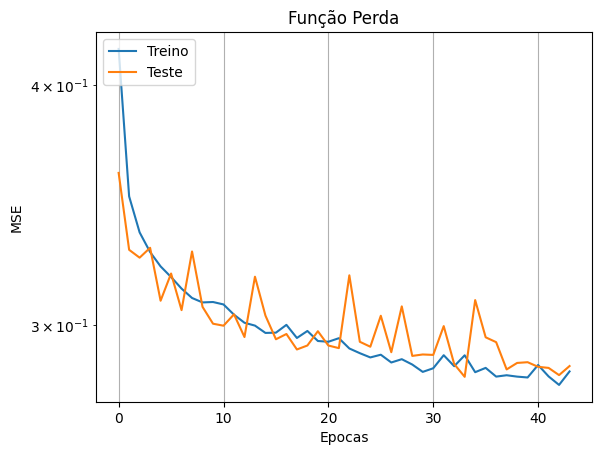

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale("log")
plt.title('Função Perda')
plt.ylabel('MSE')
plt.xlabel('Epocas')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.grid()
plt.show()


In [27]:
pd.DataFrame(history.history).to_csv('custo.csv')

## 7.Métricas: Avaliação do modelo

In [28]:
output_model_ = model.predict(x_test_padrao)
y_test_class = saida_test.values

2536/2536 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [29]:
print(output_model_)
print("y_test:",y_test_class)

[[0.2702008 ]
 [0.58220226]
 [0.9075404 ]
 ...
 [0.5982632 ]
 [0.45455465]
 [0.99958366]]
y_test: [0. 0. 1. ... 0. 1. 1.]


In [30]:
for i in range(len(output_model_)):
    if(output_model_[i]>= 0.5):
      output_model_[i] = 1
    else:
      output_model_[i] = 0
print(output_model_)

[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Acurácia:', accuracy_score(y_test_class, output_model_))
print('Precisão:', precision_score(y_test_class, output_model_))
print('Sensibilidade:', recall_score(y_test_class, output_model_))
print('F1-Score:', f1_score(y_test_class, output_model_))



Acurácia: 0.8687318179576944
Precisão: 0.8974733266096927
Sensibilidade: 0.8328612595748873
F1-Score: 0.8639609601553417


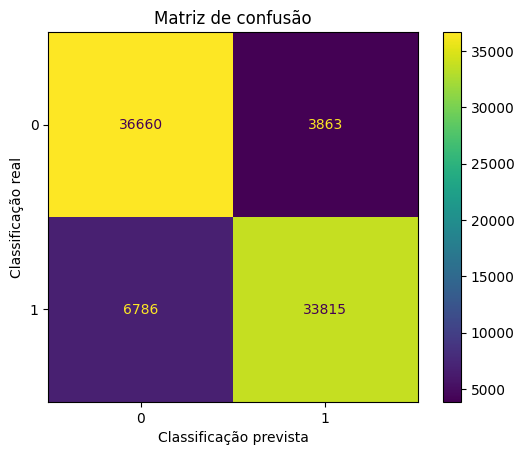

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_class, output_model_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Matriz de confusão')
disp.ax_.set_xlabel('Classificação prevista')
disp.ax_.set_ylabel('Classificação real')
plt.show()


## 8. Explicando o modelo

In [33]:
!pip install shap

In [34]:
import shap

In [ ]:
explainer  = shap.KernelExplainer(model.predict, x_test_padrao)
shap_values = explainer.shap_values(x_test_padrao)

2536/2536 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


  0%|          | 0/81124 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


In [ ]:
shap.summary_plot(shap_values,x_test_padrao,feature_names=lista)
shap.summary_plot(shap_values,x_test_padrao, plot_type="bar" ,feature_names=lista, class_names=classes)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_test_padrao)

## 9. Salvando os arquivos test e train

In [ ]:
input_train = pd.read_csv('input_train_csv')
output_train = pd.read_csv('output_train_csv')